In [30]:
import pandas


df = pandas.read_csv("benchmark.csv")
df["exp"] = df.apply(
    lambda r: ("AOT" if r["AOT"] else "") + "-" + ("REW" if r["rewriter"] else ""),
    axis=1,
)
df["exe"] = df["optimization"]
df = df[
    (df["providers"] == "CUDAExecutionProvider,CPUExecutionProvider")
    & (df["optimization"] == "GPU")
    | (df["providers"] == "CPUExecutionProvider") & (df["optimization"] == "CPU")
]
df.head(3).T

,0,2,7
processor,x86_64,x86_64,x86_64
cores,8,8,8
name,simple_dynamo.onnx.cpu.aot0.onnx,simple_script.onnx.cpu.aot0.onnx,simple_dynamo.onnx.gpu.aot0.onnx
providers,CPUExecutionProvider,CPUExecutionProvider,"CUDAExecutionProvider,CPUExecutionProvider"
optimization,CPU,CPU,GPU
AOT,1,1,1
rewriter,0,0,0
export,dynamo,script,dynamo
cuda,1,1,1
cuda_count,1,1,1


In [36]:
piv = pandas.pivot_table(df, index=["exp"], columns=["exe", "export"], values="average")
piv

exe           CPU                 GPU          
export     dynamo    script    dynamo    script
exp                                            
-        0.052878  0.007053  0.004773  0.001736
-REW     0.048131       NaN  0.004541       NaN
AOT-     0.024116  0.014891  0.002936  0.001470
AOT-REW  0.022369       NaN  0.002801       NaN

<Axes: ylabel='exe,export'>

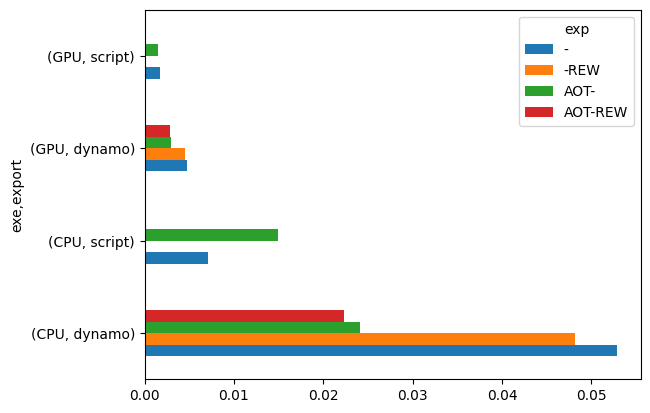

In [37]:
piv.T.plot.barh()